In [83]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt("mtfuji_data.csv",delimiter=",", skiprows=1)

In [84]:
print(fuji[0:40])#読み込みの成功

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 [    3.          35.139194   139.123441     0.         966.      ]
 [    4.          35.140878   139.12056      0.        1288.      ]
 [    5.          35.142562   139.117679     0.        1611.      ]
 [    6.          35.144246   139.114799     6.62      1933.      ]
 [    7.          35.145929   139.111917     7.21      2255.      ]
 [    8.          35.147613   139.109036    12.2       2577.      ]
 [    9.          35.149297   139.106155    54.41      2899.      ]
 [   10.          35.15098    139.103273   171.56      3222.      ]
 [   11.          35.152664   139.100392   177.84      3544.      ]
 [   12.          35.154347   139.09751    228.21      3866.      ]
 [   13.          35.15603    139.094628   275.38      4188.      ]
 [   14.          35.157714   139.091747   433.7

In [85]:
fuji = np.array(fuji) #numpyによってndarrayを作成

In [86]:
fuji[0]

array([  0.      ,  35.134141, 139.132082,   0.      ,   0.      ])

【問題1】データの可視化
---
>Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

No handles with labels found to put in legend.


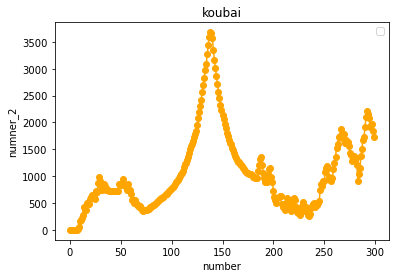

In [87]:
plt.title("koubai")
plt.xlabel("number")
plt.ylabel("numner_2")
plt.plot(fuji[:, 0], fuji[:, 3], color = "orange", marker='o')
plt.legend()
plt.show()

【問題2】ある地点の勾配を計算する関数を作成
---
>「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。
「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。
勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

>勾配　＝　yの変化量/x変化量


In [102]:
# def slope(fuji):
#     # xの変化量 ずらしてかける その他の番号
#     fuji_1 = fuji[1:, 0]
#     fuji_2 = fuji[:-1, 0]
#     # yの変化量　ずらしてかける　標高
#     fuji_1_y = fuji[1:, 3]
#     fuji_2_y = fuji[:-1, 3]
#     # 変化量の計算
#     fuji_xchanges = fuji_2 - fuji_1
#     fuji_ychanges = fuji_2_y - fuji_1_y
#     # 勾配
#     gradient = fuji_ychanges/fuji_xchanges
#     return gradient, fuji_xchanges

# slope(fuji)

>文章に対して考え方が間違っていいたようなので、こちらに新たに記載する。



In [103]:
def cal_gradient(now_point, elevations):
    a = elevations[now_point] -  elevations[now_point-1]
    return a

now_position = 136
elevations = fuji[:, 3]
cal_gradient(now_position, elevations)
print('{}地点の勾配計算:{}'.format(now_position, cal_gradient(now_position, elevations)))

136地点の勾配計算:168.35000000000036


array([   0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    6.62,
          7.21,   12.2 ,   54.41,  171.56,  177.84,  228.21,  275.38,
        433.76,  371.74,  380.06,  503.4 ,  485.39,  477.82,  580.5 ,
        610.92,  654.96,  628.22,  626.64,  572.55,  723.95,  701.94,
        879.47,  976.17,  919.16,  817.  ,  743.06,  770.92,  864.06,
        826.52,  748.39,  756.11,  724.5 ,  724.5 ,  724.5 ,  724.5 ,
        724.5 ,  724.5 ,  724.5 ,  724.5 ,  724.5 ,  724.5 ,  852.18,
        851.36,  831.  ,  880.44,  955.14,  849.52,  831.6 ,  790.01,
        738.97,  848.83,  738.3 ,  736.48,  672.24,  564.02,  552.23,
        497.41,  558.28,  503.02,  462.33,  469.66,  429.49,  454.21,
        412.27,  362.29,  355.68,  368.91,  371.04,  371.19,  377.62,
        386.64,  390.14,  418.41,  420.6 ,  443.  ,  458.66,  471.82,
        488.4 ,  505.1 ,  519.54,  536.54,  553.64,  575.07,  588.99,
        602.36,  613.04,  631.71,  660.43,  672.36,  700.15,  725.72,
        741.17,  753

【問題3】移動先の地点を計算する関数を作成
---
>今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。
数式で表すと 「移動先の地点 = 今いる地点 - $\alpha$ ×今いる地点の勾配」 となります。
「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。$\alpha$ は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。

In [119]:
def moved_point(now_position, elevations, alpha=0.1):
    
    y = now_position - alpha * cal_gradient(now_position, elevations)
    y = np.maximum(1, y) # 範囲より小さい値を範囲内に収める（1未満を1にする）
    y = np.minimum(len(elevations)-1, y) # 範囲より大きい値を範囲内に収める
    next_position_int = np.round(y).astype(np.int)
    return next_position_int

now_position = 136
elevations = fuji[:, 3]
moved_point(now_position, elevations)
print('次の勾配は{}'.format(moved_point(now_position, elevations)))

次の勾配は119


問題４山を下る関数を作成
---
>山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。
最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

In [126]:
def decrease_montain(now_position, elevations, alpha=0.1):
    position_list = [now_position]
    while position_list[-1] not in position_list[:-1]:
        current_positon = moved_point(position_list[-1], elevations, alpha=alpha)
        position_list.append(current_positon)
    return position_list[:-1]

now_position = 136
elevations = fuji[:, 3]
descended_list = decrease_montain(now_position, elevations, alpha=0.1)

# print('次の勾配は{}'.format(moved_point(now_position, elevations)))

[136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]

【問題5】下山過程の可視化
---
>問題4における下山過程をMatplotlibを使いグラフで可視化してください。



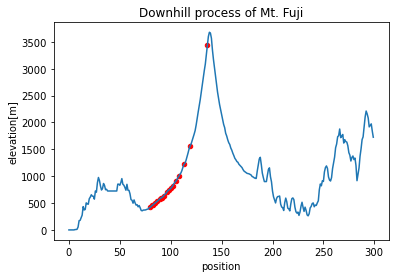

In [127]:
descended_elevations = elevations[descended_list]

plt.title('Downhill process of Mt. Fuji')
plt.ylabel('elevation[m]')
plt.xlabel('position')
plt.plot(elevations)
plt.scatter(descended_list, descended_elevations, 20, color='red')
plt.show()

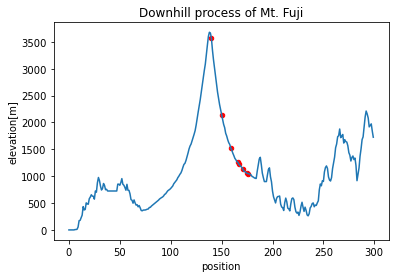

In [128]:
now_position = 140 #初期値を140に変更
elevations = fuji[:, 3]
descended_list = decrease_montain(now_position, elevations, alpha=0.1)

descended_elevations = elevations[descended_list]

plt.title('Downhill process of Mt. Fuji')
plt.ylabel('elevation[m]')
plt.xlabel('position')
plt.plot(elevations)
plt.scatter(descended_list, descended_elevations, 20, color='red')
plt.show()